In [1]:
from __future__ import print_function, division
%matplotlib inline
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import operator
import requests
import sys
import operator
from scipy import stats
from fiona.crs import from_epsg

In [2]:
matplotlib.style.use('seaborn-pastel')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,10)

In [3]:
os.system("curl -O https://data.cityofnewyork.us/api/views/jfzu-yy6n/rows.csv")
os.system("mv " + "rows.csv " + os.getenv("PUIDATA"))
df = pd.read_csv(os.getenv("PUIDATA") + "/" + "rows.csv")
df.head()

,"BBL (Borough, Block and Lot)",Facility Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,...,Building Type,City Council District,Total area of buildings on lot,Number of buildings on property (tax lot),Number of floors,Number of residential units,Number of total units,Year constructed,Condominium housing?,Cooperative housing?
0,1007910062,"130 16 STREET\nManhattan, NY 10011\n(40.739041...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Office Buildings,3,32384,1,6,42,42,1927,,
1,1012440072,"441 END AVENUE\nManhattan, NY 10024\n(40.78362...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Elevator Apartments,6,240040,2,15,87,103,1926,,
2,2025080024,"64 165 STREET\nBronx, NY 10452\n(40.8318680928...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Elevator Apartments,17,21460,1,5,30,33,1925,,
3,2029900034,"1693 VYSE AVENUE\nBronx, NY 10460\n(40.8356790...",2,10460.0,40.835731,-73.886595,3.0,17.0,161.0,2010678.0,...,Loft Buildings,15,23750,1,5,26,26,1931,,
4,2024720028,"1049 GRAND\nBronx, NY 10452\n(40.8377242633641...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Elevator Apartments,16,29400,1,5,36,37,1917,,


In [4]:
df.columns

Index(['BBL (Borough, Block and Lot)', 'Facility Address', 'Borough',
       'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'NTA',
       'Natural Gas Utility (Con Edison or National Grid', 'Building Manager',
       'Owner', 'Owner Address', 'DEP Boiler Application #',
       'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)',
       'Boiler Model', 'Number of identical boilers',
       'Boiler capacity (Gross BTU)', 'Boiler Installation Date',
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?', 'Age range of boiler', 'Burner Model',
       'Primary Fuel', 'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Needs to co

In [5]:
df.drop(['BBL (Borough, Block and Lot)', 'Borough', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'NTA',
       'Natural Gas Utility (Con Edison or National Grid', 'Building Manager',
       'Owner', 'Owner Address', 'DEP Boiler Application #',
       'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)',
       'Boiler Model', 'Number of identical boilers',
       'Boiler capacity (Gross BTU)', 
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?', 'Age range of boiler', 'Burner Model',
       'Primary Fuel',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Needs to comply with Greener Greater Buildings Laws?',
       'Deadline for complying with Audit and Retrocommissioning Law',
       'Building Type', 'City Council District',
       'Total area of buildings on lot',
       'Number of buildings on property (tax lot)', 'Number of floors',
       'Number of residential units', 'Number of total units',
       'Year constructed', 'Condominium housing?', 'Cooperative housing?'], axis=1, inplace=True)
df.head()

,Facility Address,Postcode,Latitude,Longitude,Boiler Installation Date,Total Estimated Cosumption - High Estimate (Gallons)
0,"130 16 STREET\nManhattan, NY 10011\n(40.739041...",NaN,NaN,NaN,1979,32016
1,"441 END AVENUE\nManhattan, NY 10024\n(40.78362...",NaN,NaN,NaN,1983,146000
2,"64 165 STREET\nBronx, NY 10452\n(40.8318680928...",NaN,NaN,NaN,1956,30814
3,"1693 VYSE AVENUE\nBronx, NY 10460\n(40.8356790...",10460.0,40.835731,-73.886595,1983,25309
4,"1049 GRAND\nBronx, NY 10452\n(40.8377242633641...",NaN,NaN,NaN,1988,25000


In [6]:
a = df['Facility Address'][0]
a

'130 16 STREET\nManhattan, NY 10011\n(40.739041337693116, -73.99679142282815)'

In [7]:
df = df.dropna(subset=['Facility Address'], how='any')

In [8]:
df.reset_index(inplace=True)

In [9]:
zip_code = []
for i in range(len(df)):
    zip_code.append(df['Facility Address'][i].split('\n')[1].split()[-1][:5])

In [10]:
zip_code = np.asarray(zip_code, dtype=str)

In [11]:
total_consumption_gallons = df['Total Estimated Cosumption - High Estimate (Gallons) ']
boiler_installation_date = df['Boiler Installation Date']

In [12]:
df = pd.DataFrame(data=[zip_code, total_consumption_gallons, boiler_installation_date]).T
df.columns = [ 'zip_code', 'total_consumption_gallons', 'boiler_installation_date']
df.head()

,zip_code,total_consumption_gallons,boiler_installation_date
0,10011,32016,1979
1,10024,146000,1983
2,10452,30814,1956
3,10460,25309,1983
4,10452,25000,1988


In [13]:
df.shape

(8045, 3)

In [14]:
df['boiler_installation_date'] = pd.to_numeric(df['boiler_installation_date'], errors='coerce')
df= df[df['boiler_installation_date']<2015]

In [15]:
df.count()

zip_code                     8045
total_consumption_gallons    8045
boiler_installation_date     8045
dtype: int64

In [16]:
df.dtypes

zip_code                     object
total_consumption_gallons    object
boiler_installation_date      int64
dtype: object

In [17]:
df['total_consumption_gallons'] = pd.to_numeric(df['total_consumption_gallons'], errors='coerce')

In [18]:
df.dtypes

zip_code                     object
total_consumption_gallons     int64
boiler_installation_date      int64
dtype: object

In [19]:
df = df.dropna(subset=['zip_code'])

In [20]:
len(df)

8045

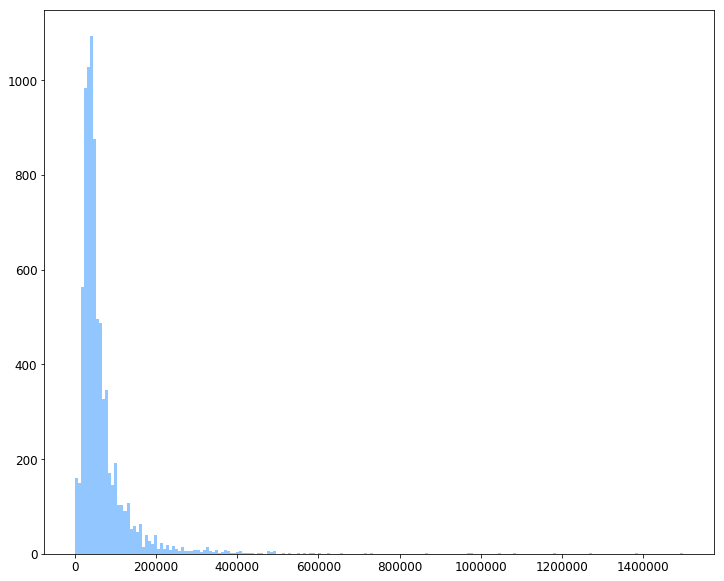

In [21]:
plt.hist(df['total_consumption_gallons'], bins=200)
plt.show()

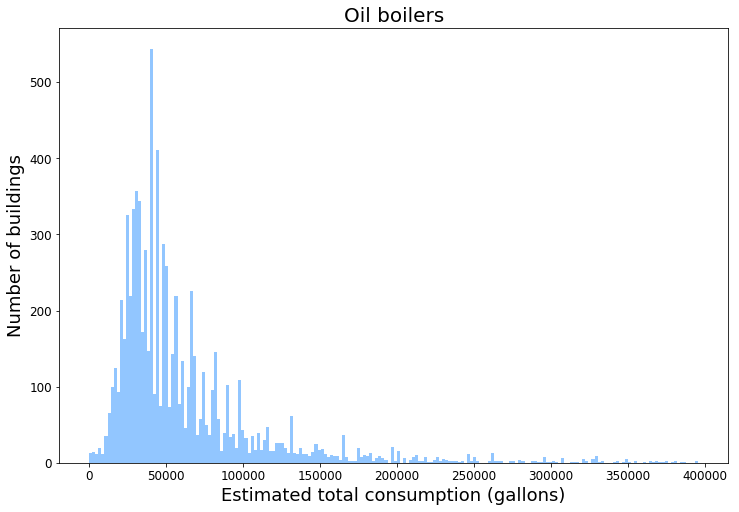

Estimated total consumption by the oil boilers in 2015. The distribution skewed right.


In [22]:
df = df[df['total_consumption_gallons']>0]
df = df[df['total_consumption_gallons']<400000]

fig = plt.figure(figsize=(12,8))
plt.hist(df['total_consumption_gallons'], bins=200)
plt.title('Oil boilers', fontsize = 20)
plt.xlabel('Estimated total consumption (gallons)', fontsize = 18)
plt.ylabel('Number of buildings', fontsize = 18)
plt.savefig('oil_boilers_2015', dpi=300, transparent=True)
plt.show()
print ('Estimated total consumption by the oil boilers in 2015. ' +
       'The distribution skewed right.')

In [23]:
len(df)

7883

In [24]:
dfzip = df.groupby("zip_code").sum()
dfzip.reset_index(inplace=True)

In [25]:
dfzip.to_csv('boiler_estimate_cosumption_2015_byzipcode.csv')

In [26]:
type(dfzip)

pandas.core.frame.DataFrame

In [27]:
os.system("curl -O http://catalog.civicdashboards.com/dataset/11fd957a-8885-42ef-aa49-5c879ec93fac/resource/28377e88-8a50-428f-807c-40ba1f09159b/download/nyc-zip-code-tabulation-areas-polygons.geojson")
os.system("mv " + "nyc-zip-code-tabulation-areas-polygons.geojson " + os.getenv("PUIDATA"))
nyc = gpd.read_file(os.getenv("PUIDATA") + "/" + 'nyc-zip-code-tabulation-areas-polygons.geojson')

In [28]:
nyc['zip_code'] = nyc.postalCode.astype(str)
nyc.drop(['OBJECTID', 'postalCode', 'PO_NAME', 'STATE', 'borough', 'ST_FIPS',
          'CTY_FIPS', 'BLDGpostal', '@id', 'longitude', 'latitude'], axis=1, inplace=True)

In [29]:
nyc = nyc.sort_values(by='zip_code', ascending=True)

In [30]:
mapData = pd.merge(nyc, dfzip, on='zip_code').drop_duplicates('zip_code')
mapData.head()

,geometry,zip_code,total_consumption_gallons,boiler_installation_date
0,POLYGON ((-74.00827017711134 40.75258714368449...,10001,12352480,351629
1,POLYGON ((-73.97441674489379 40.73642441865476...,10002,1850799,51694
2,POLYGON ((-73.97986374196766 40.73497446573838...,10003,9808501,287956
3,POLYGON ((-74.04699098912498 40.69012472491997...,10004,1081638,13897
7,"POLYGON ((-74.00596661578348 40.7043243225291,...",10005,85200,1969


In [31]:
mapData.crs = from_epsg(4326) #from lat/long
mapData['geometry'] = nyc.to_crs(epsg=2263).geometry
mapData = gpd.GeoDataFrame(mapData)

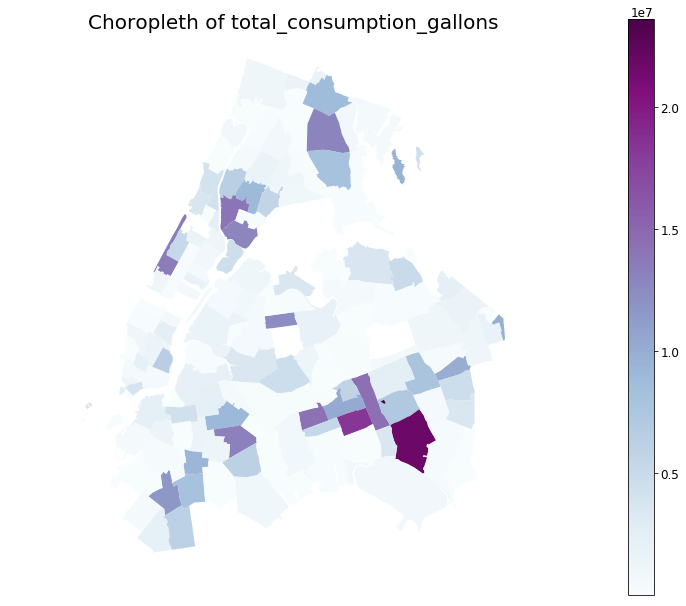

In [32]:
name = 'total_consumption_gallons'
ax = mapData.plot(column='{}'.format(name), cmap='BuPu', alpha=1)
vmin, vmax = min(mapData['{}'.format(name)].values), max(mapData['{}'.format(name)].values)
ax.axis('off')
ax.set_title('Choropleth of {}'.format(name), size=20)
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('boiler_total_consumption_gallons', dpi=300, transparent=True)
plt.show()